# <center>Google Play Vs App Store</center>

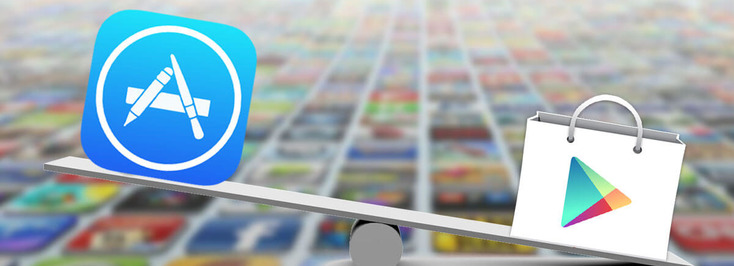

In [1]:
from IPython.display import Image
Image(filename='ApplevsGoogle.jpeg')

In [25]:
import warnings
from bs4 import BeautifulSoup
import pandas as pd
from pandas import DataFrame, read_csv
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import IPython
from urllib.request import urlopen
import re

In [55]:
#Impprting the new cleaned Datasets
### The Google Play data set ###
googleData=pd.read_csv(r'googleplaystoreNew.csv',header=0)

### The App Store data set ###
appleData=pd.read_csv(r'ApplestoreNew.csv',header=0)

#some adjustments:
googleData.rename(columns={'Type':'isFree'},inplace=True)
appleData.rename(columns={'price':'Price'},inplace=True)
googleData.drop(['Current Ver'], axis=1,inplace=True)

In [38]:
appleData['isFree'] = appleData['Price'].apply(lambda x: 1 if x == 0 else 0)
googleData['isFree'] = googleData['isFree'].apply(lambda x: 1 if x == 'Free' else 0)

In [5]:
googleData['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [6]:
appleData['Category'].unique()

array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       'Sports', 'Business', 'Health & Fitness', 'Entertainment',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
      dtype=object)

-As we can see google Play store have more categories than the App store, in order to arrange and control the data better, i'm changing the Play store categories to App store categories.

(I didnt changed it arbitrary, If the category name is not the same or alike, I checked for several apps in the dataset,Where they are assinged to in both datasets, in order to assign to its best category)

In [7]:
googleData.Category=googleData.Category.str.replace('ART_AND_DESIGN','Entertainment')
googleData.Category=googleData.Category.str.replace('AUTO_AND_VEHICLES','Utilities')
googleData.Category=googleData.Category.str.replace('BEAUTY','Lifestyle')
googleData.Category=googleData.Category.str.replace('BOOKS_AND_REFERENCE','Book')
googleData.Category=googleData.Category.str.replace('BUSINESS','Business')
googleData.Category=googleData.Category.str.replace('COMICS','Entertainment')
googleData.Category=googleData.Category.str.replace('COMMUNICATION','Other')
googleData.Category=googleData.Category.str.replace('DATING','Social Networking')
googleData.Category=googleData.Category.str.replace('ENTERTAINMENT','Entertainment')
googleData.Category=googleData.Category.str.replace('EDUCATION','Education')
googleData.Category=googleData.Category.str.replace('EVENTS','Entertainment')
googleData.Category=googleData.Category.str.replace('FINANCE','Finance')
googleData.Category=googleData.Category.str.replace('FOOD_AND_DRINK','Food & Drink')
googleData.Category=googleData.Category.str.replace('HEALTH_AND_FITNESS','Health & Fitness')
googleData.Category=googleData.Category.str.replace('HOUSE_AND_HOME','Lifestyle')
googleData.Category=googleData.Category.str.replace('LIBRARIES_AND_DEMO','Book')
googleData.Category=googleData.Category.str.replace('LIFESTYLE','Lifestyle')
googleData.Category=googleData.Category.str.replace('GAME','Games')
googleData.Category=googleData.Category.str.replace('PRODUCTIVITY','Productivity')
googleData.Category=googleData.Category.str.replace('FAMILY','Social Networking')
googleData.Category=googleData.Category.str.replace('MEDICAL','Medical')
googleData.Category=googleData.Category.str.replace('SOCIAL','Social Networking')
googleData.Category=googleData.Category.str.replace('SHOPPING','Shopping')
googleData.Category=googleData.Category.str.replace('PHOTOGRAPHY','Photo & Video')
googleData.Category=googleData.Category.str.replace('SPORTS','Health & Fitness')
googleData.Category=googleData.Category.str.replace('TRAVEL_AND_LOCAL','Travel')
googleData.Category=googleData.Category.str.replace('TOOLS','Utilities')
googleData.Category=googleData.Category.str.replace('PERSONALIZATION','Entertainment')
googleData.Category=googleData.Category.str.replace('PARENTING','Education')
googleData.Category=googleData.Category.str.replace('WEATHER','Weather')
googleData.Category=googleData.Category.str.replace('VIDEO_PLAYERS','Photo & Video')
googleData.Category=googleData.Category.str.replace('NEWS_AND_MAGAZINES','News')
googleData.Category=googleData.Category.str.replace('MAPS_AND_NAVIGATION','Lifestyle')

In [8]:
googleData['Category'].unique()

array(['Entertainment', 'Utilities', 'Lifestyle', 'Book', 'Business',
       'Other', 'Social Networking', 'Education', 'Finance',
       'Food & Drink', 'Health & Fitness', 'Games', 'Medical', 'Shopping',
       'Photo & Video', 'Travel', 'Productivity', 'Weather', 'News'],
      dtype=object)

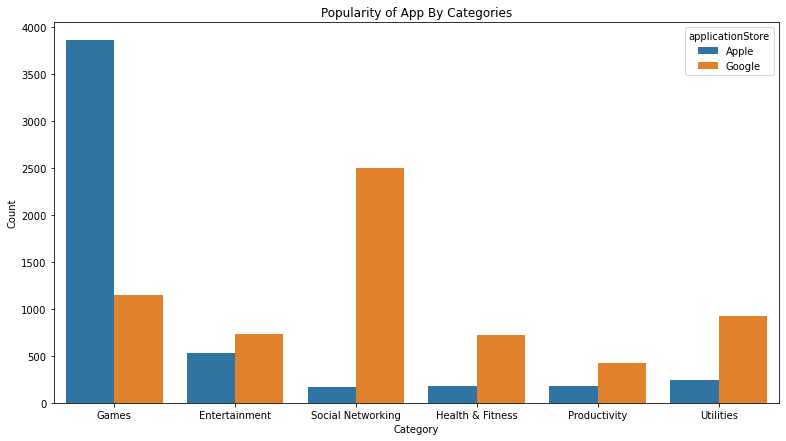

In [9]:
# temp = googleData["Category"]
# temp.value_counts().plot.bar()
# plt.xticks()
# # plt.title("Popularity of App Categories")
# # plt.figure(figsize=(20,6))

temp1 = appleData["Category"].value_counts().head(15)
temp2= googleData['Category'].value_counts().head(15)

f, ax = plt.subplots(figsize=(13, 7))
df1=pd.DataFrame({'Category':['Games','Entertainment','Social Networking','Health & Fitness','Productivity','Utilities'],
                  'Count':[temp1['Games'],temp1['Entertainment'],temp1['Social Networking'],temp1['Health & Fitness'],
                       temp1['Productivity'],temp1['Utilities']]})
df2=pd.DataFrame({'Category':['Games','Entertainment','Social Networking','Health & Fitness','Productivity','Utilities'],
                  'Count':[temp2['Games'],temp2['Entertainment'],temp2['Social Networking'],temp2['Health & Fitness'],
                       temp2['Productivity'],temp2['Utilities']]})
df1['applicationStore']= 'Apple'
df2['applicationStore']= 'Google'
res=pd.concat([df1,df2])
plt.title("Popularity of App By Categories")
sns.barplot(x='Category',y='Count',data=res,hue='applicationStore')
plt.show()


Insights:
-As we can see the distribution of applications categories are diffrent, it seems that apple store (and users) are focusing on games instead social media as play store users. (Games category is worth more than half of the applications in the store)

-In google play store there are more diversion, but social media is rulling with no doubt.

# next im going to check is the revenues differences

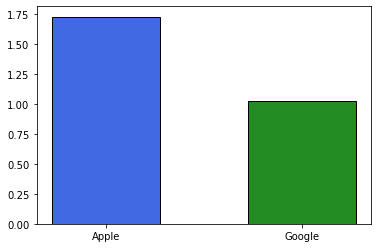

In [10]:
#normalized revenues in raw data from dataset
number_of_rows1 = len(appleData.index)
number_of_rows2 = len(googleData.index)
bars1 = [appleData.Price.sum()/number_of_rows1]
bars2 = [googleData.Price.sum()/number_of_rows2]

plt.bar(x='Apple',height= bars1, color='royalblue', width=0.55,edgecolor='black')
plt.bar(x='Google',height= bars2, color='forestgreen', width=0.55, edgecolor='black')
plt.show()

# Scraping images and statistics from the web: 

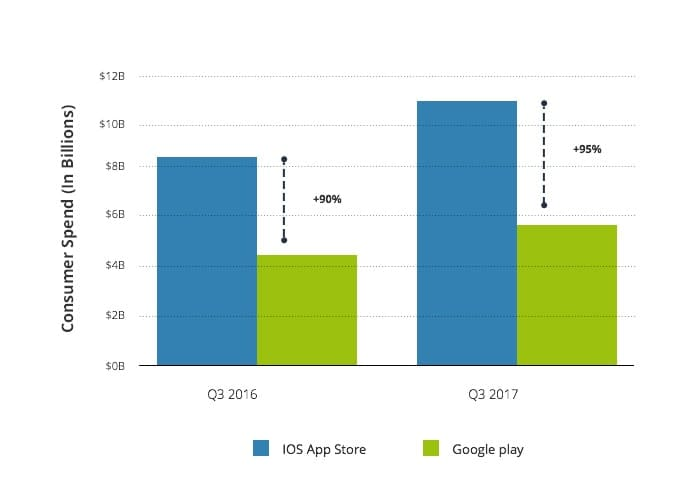

In [62]:
#image scraping from https://ddi-dev.com/ (the blog) which is a platform to create dev ops projects.
html = urlopen('https://ddi-dev.com/blog/programming/10-differences-between-android-and-ios-app-development/')
bs = BeautifulSoup(html, 'html.parser')
images = bs.find_all('img', {'src':re.compile('.jpeg')})
url=[]
for image in images: 
    url.append('https://ddi-dev.com/' + image['src'])
    
display(IPython.display.Image(url[4]))


"_Worldwide consumer spend is also still growing. In Q3 of 2016, revenue from Android-powered apps and those on Apple Store combined reached more than $16 billion, up 28 percent over the year prior. In Q3 of 2017, the consumer spends on iOS was almost double that of Google Play. But both stores reached record levels of consumer spends, thanks to year over year growth rates over 25 percent_."

[link](https://ddi-dev.com/blog/programming/10-differences-between-android-and-ios-app-development/)

- The scraped image from ddi-dev blog and the graph before (revenue diffrences) are quite similar, Even though it's a rough analysis, We can know the dataset is reliable (this dataset if from 2018).

# Size differencess:

In [1]:
#normalized sizes in raw data from dataset
number_of_rows3 = len(appleData.index)
number_of_rows4 = len(googleData.index)
bars1 = [appleData.sizeInMB.sum()/1000]
bars2 = [(googleData.SizeInMB.sum())/1000]

plt.bar(x='Apple',height= bars1, color='royalblue', width=0.55,edgecolor='black')
plt.bar(x='Google',height= bars2, color='forestgreen', width=0.55, edgecolor='black')
plt.ylabel("size in GB")
plt.show()


NameError: name 'appleData' is not defined

# Most Popular App by Genre on the App Store
A way to find most popular app is to calculate the average number of installs for each app genre. In Google Play data set, we can find this information in the Installs column, but for the App Store data set this information is missing.

Another way i'm going to take the total number of user ratings , which we can find in the RatingNum.

Below, we calculate the average number of user ratings per app genre on the App Store:

In [2]:
#in google play store there was missing some info, ssome of the ratings was NaN's 
#so wherever there was Nan's (which later i turned into 0, i'm entering the avrage rating of all column)
#print(googleData.Rating.mean()) -->4.191757420456972
#print(appleData.Rating.mean()) -->3.526955675976101
googleData['Rating'] = googleData['Rating'].apply(lambda x: float(x))
googleData['Rating'] = googleData['Rating'].apply(lambda x: 4.191 if np.isnan(x) else x)
appleData['Rating'] = appleData['Rating'].apply(lambda x: float(x))
appleData['Rating'] = appleData['Rating'].apply(lambda x: 3.526 if x==0 else x)

g1 = sns.kdeplot(appleData.Rating, color="red", shade = True,label='Apple')
g2 = sns.kdeplot(googleData.Rating, color="Blue", shade = True,label='Google')
g1.set_xlabel("Rating")
g1.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
#googleData['Rating'].isna().sum() 1474/10840=0.135
#appleData[appleData['Rating']==0].Rating.count() 929/7198 =0.129

print('Mean apple Ratings: ' ,appleData['Rating'].mean())
print('Mean google Ratings: ' ,googleData['Rating'].mean())


NameError: name 'googleData' is not defined

- There were 1474 NaN's (Missing data) in Play Store, and 929 in App Store, which is 0.135 and 0.129 precent (Respectively), that's not a lot so i inserted the mean Rating of each store.

- We also can see that Ratings are similar, Average is very close.